In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../libs")
from esnlib import *
from helpers import *

import seaborn as sns
import statsmodels.api as statm

import rpy2
import glob
import os

init_cut = 0
cut = 200
conf = 75
%matplotlib inline

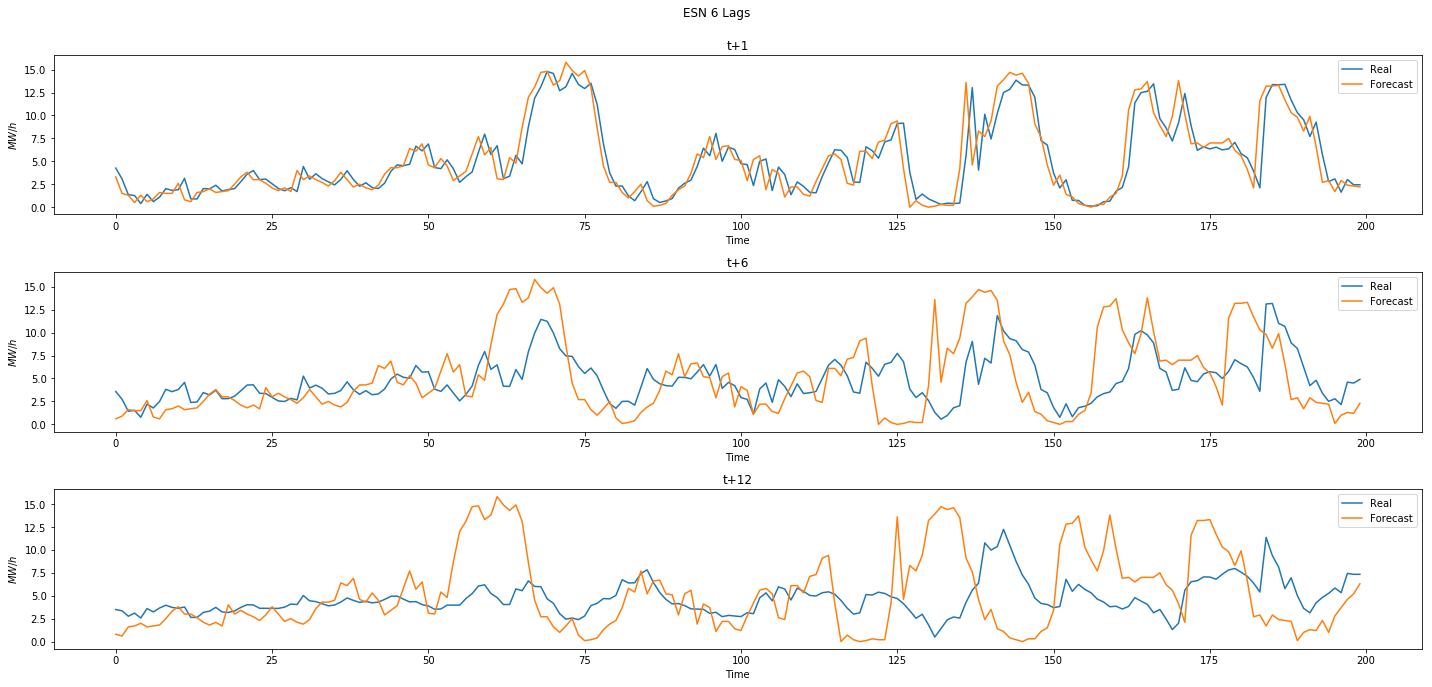

$t+0$     $t+5$     $t+11$  $\overline{t+i}$
MAE    0.876240  2.139929   2.588377          2.032700
MSE    2.186756  9.043090  12.174461          8.580248
MeAE   0.442823  1.410049   1.805209          1.337064
MAPE   0.283119  0.691415   0.835911          0.656668
$r^2$  0.853124  0.392597   0.182158          0.423646

In [4]:
lag = 6
y_pred = pd.read_csv("../../results/esn_results/multi_results/canela1_y_pred_test_multi_{}lags.csv".format(lag),index_col=0)
y_test = pd.read_csv("../../results/esn_results/multi_results/canela1_y_test_multi_{}lags.csv".format(lag),index_col=0)

fig, ax = plt.subplots(3,1,figsize=(20,10),sharey=True)
fig.suptitle("ESN {} Lags".format(lag))
for j,i in enumerate([0,5,11]):
    ax[j].set_title("t+{}".format(i+1))
    ax[j].plot(y_pred.values[:cut,i])
    ax[j].plot(y_test.values[:cut,i])
    ax[j].legend(["Real","Forecast"])
    ax[j].set_xlabel("Time")
    ax[j].set_ylabel("$MW/h$")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
display(show_errors(y_test,y_pred).iloc[:,[0,5,11,12]])

In [3]:
resids = y_pred.values - y_test.values
resids = pd.DataFrame(resids)

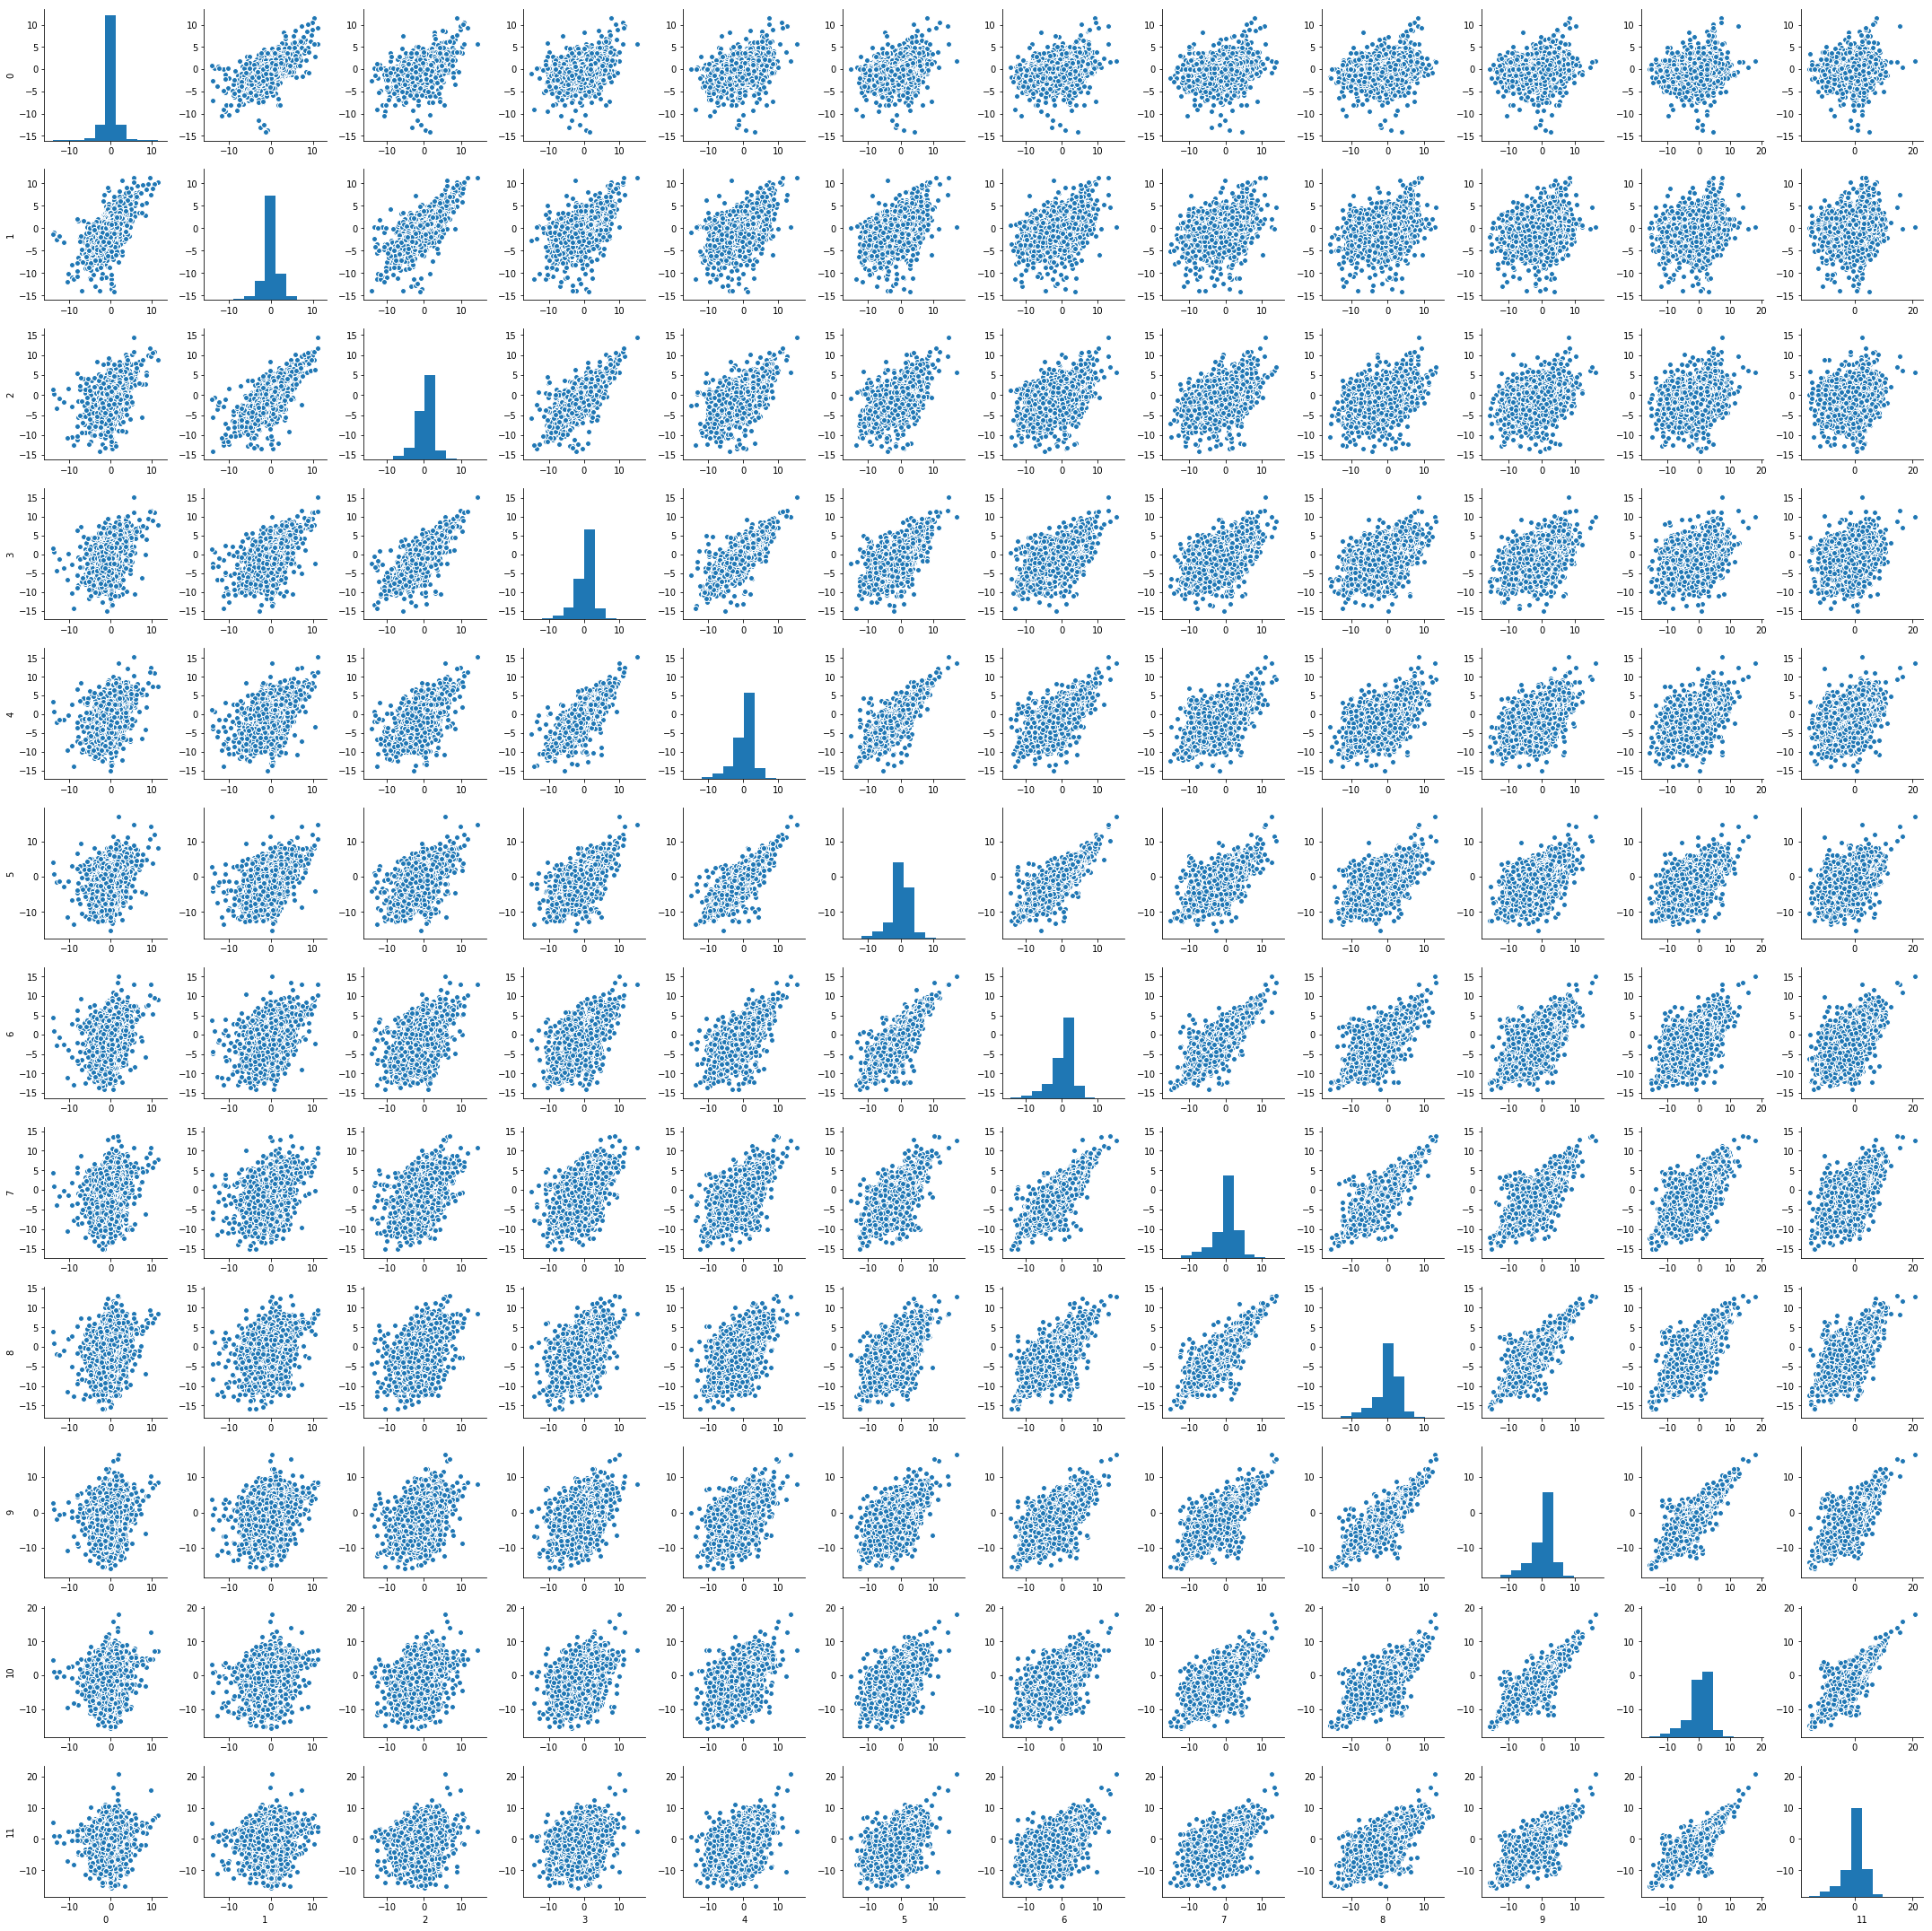

In [4]:
sns.pairplot(resids)

1-th resid
Mean 0.019845673785958057
Std 1.4787371427400167


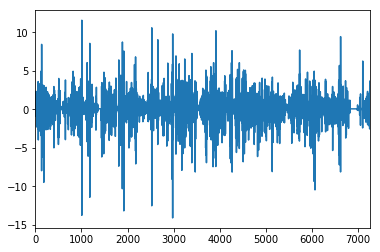

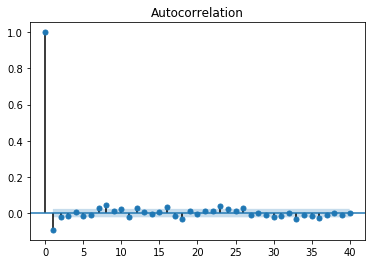

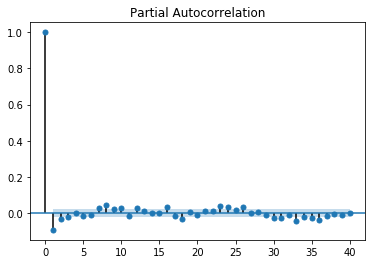

6-th resid
Mean 0.10224991924723416
Std 3.0056412806915542


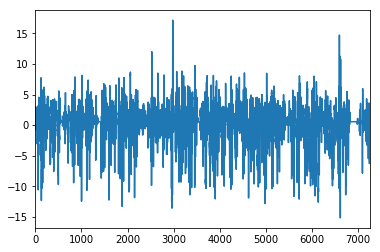

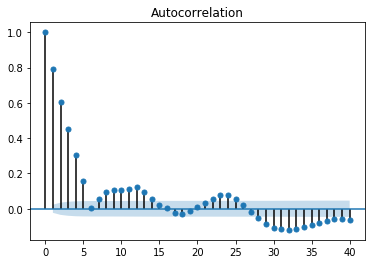

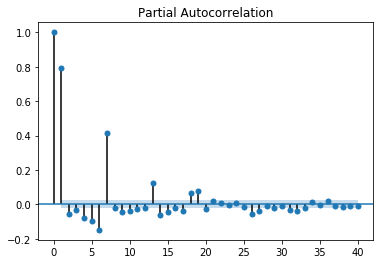

12-th resid
Mean 0.10632344465592812
Std 3.4878119720139393


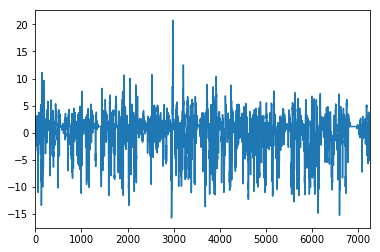

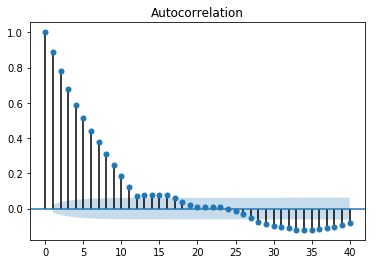

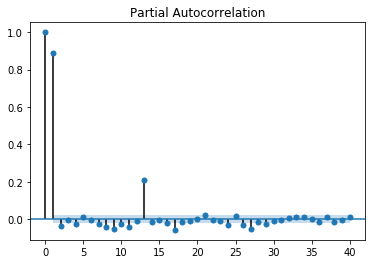

In [5]:
for i in [0,5,11]:
    print("{}-th resid".format(i+1))
    resid_i = resids.iloc[:,i]
    resid_i.plot()
    print("Mean {}".format(resid_i.mean()))
    print("Std {}".format(resid_i.std()))
    statm.graphics.tsa.plot_acf(resid_i, lags=40)
    statm.graphics.tsa.plot_pacf(resid_i,lags=40)
    plt.show()

/home/tronco/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


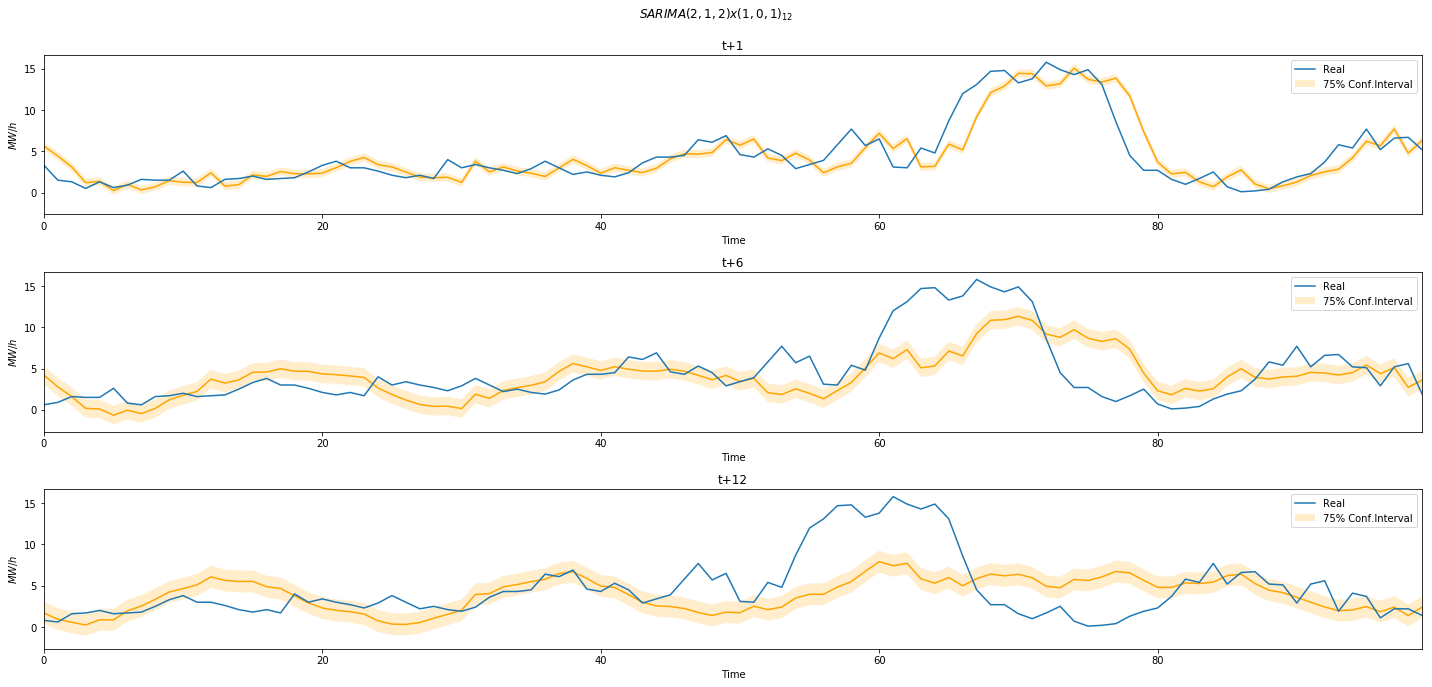

$t+0$     $t+5$     $t+11$  $\overline{t+i}$
MAE    1.271117  2.245989   2.596592          2.160533
MSE    4.212253  9.314384  11.728879          9.007707
MeAE   0.663502  1.698783   2.097353          1.611062
MAPE   0.411011  0.725530   0.838286          0.697869
$r^2$  0.717357  0.375270   0.213263          0.395792

In [6]:
source = "canela"
files = glob.glob("../../results/best_sarimas/*"+source+"*.csv")
results = {}
for file in files:
    filetype = "_".join(os.path.basename(file).split("_")[10:]).replace(".csv", "")  
    results[filetype] = pd.read_csv(file)
fig, ax = plt.subplots(3,1,figsize=(20,10),sharey=True)
fig.suptitle("$SARIMA(2,1,2)x(1,0,1)_{12}$")
for j,i in enumerate([0,5,11]):
    ax[j].set_title("t+{}".format(i+1))
    data  = np.vstack([results["y_approx"].values[init_cut:cut,i],results["y_approx_{}_lo".format(conf)].values[init_cut:cut,i],
              results["y_approx_{}_hi".format(conf)].values[init_cut:cut,i]])
    sns.tsplot(data=data, ax = ax[j],color="orange")
    ax[j].plot(results["y_test"].values[init_cut:cut,i])

    ax[j].legend(["Real","{}% Conf.Interval".format(conf)])
    ax[j].set_xlabel("Time")
    ax[j].set_ylabel("$MW/h$")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
display(show_errors(results["y_test"],results["y_approx"]).iloc[:,[0,5,11,12]])


In [7]:
resids = results["y_test"]-results["y_approx"]

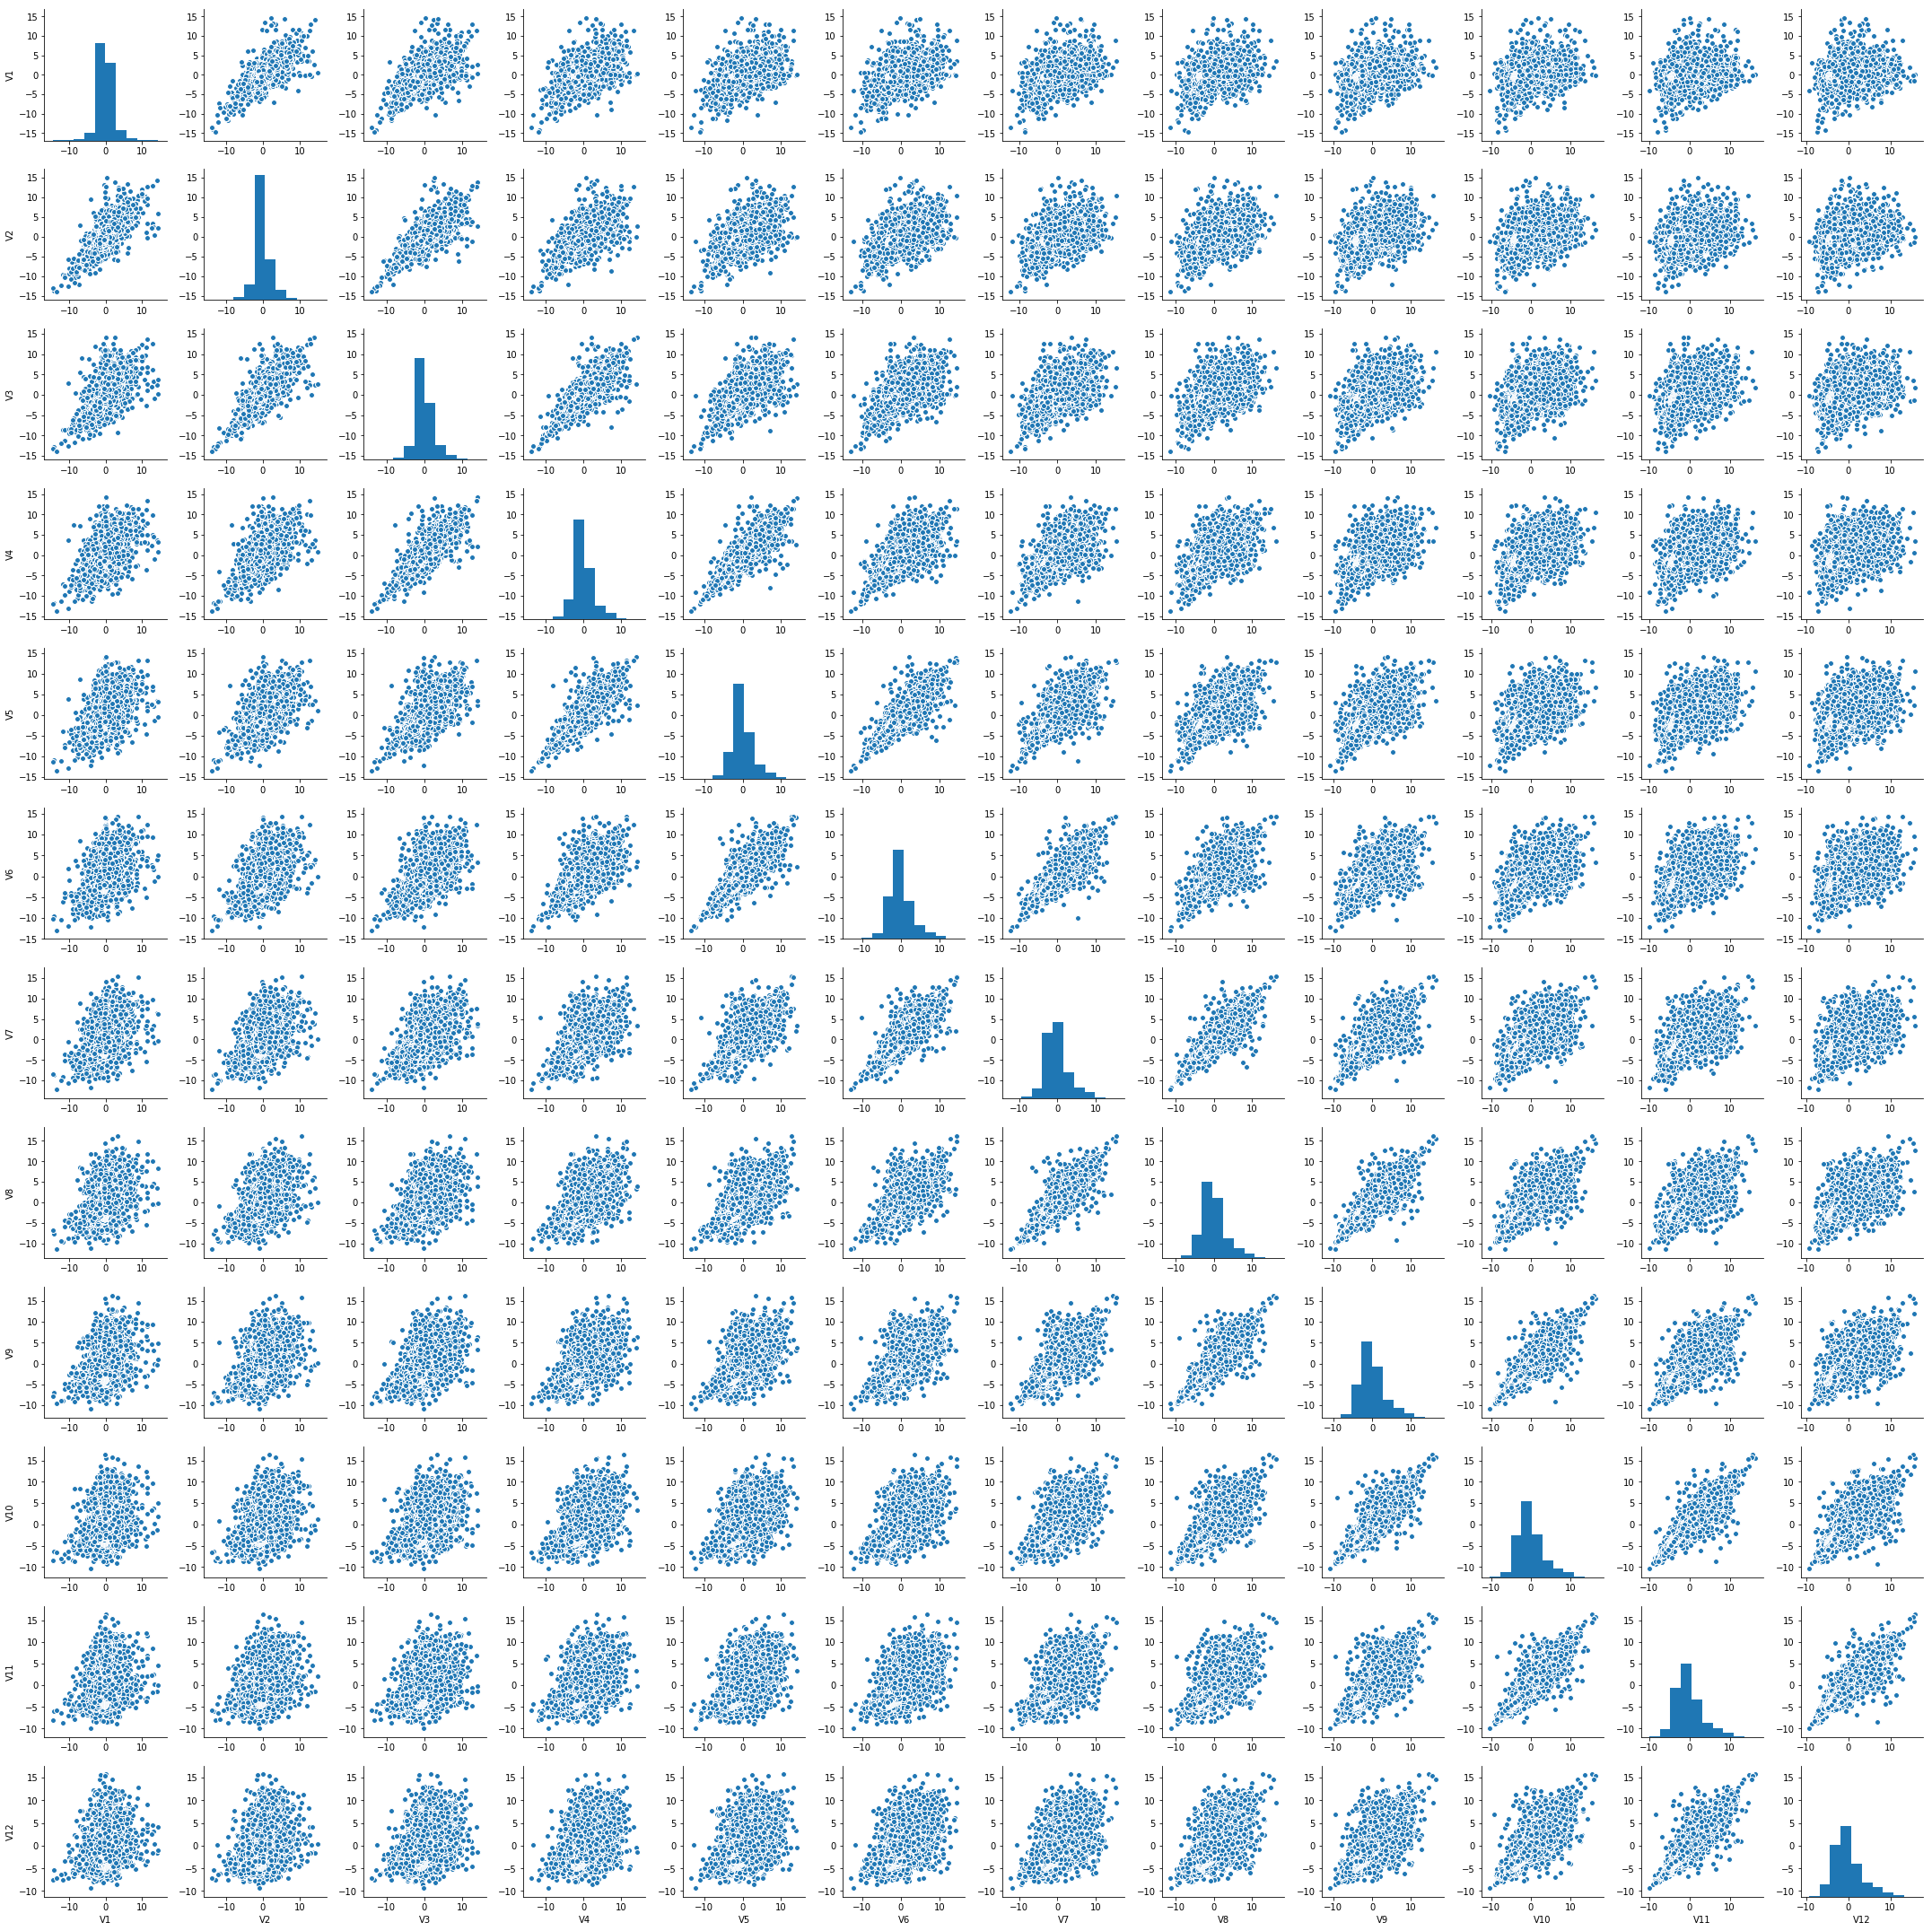

In [8]:
sns.pairplot(resids)

1-th resid
Mean -0.008215479230008938
Std 2.0525024858537853


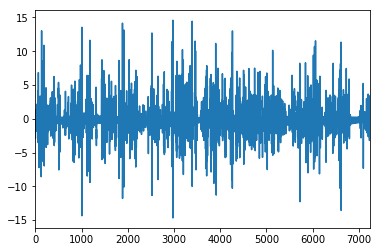

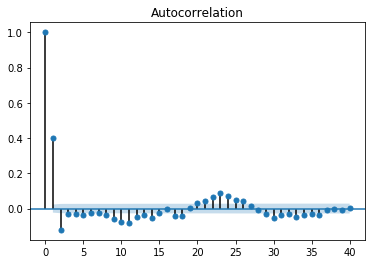

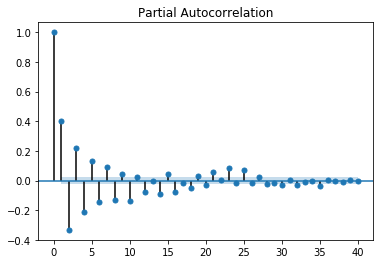

6-th resid
Mean -0.04075704521181673
Std 3.0518860660974276


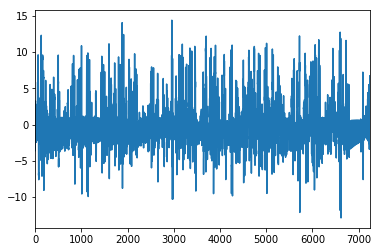

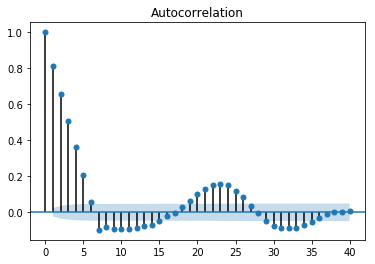

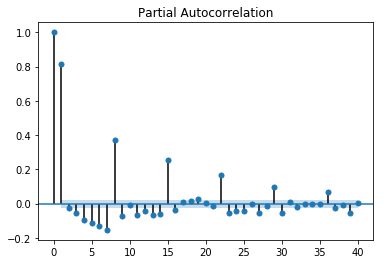

12-th resid
Mean -0.06687379167269801
Std 3.4243284379030543


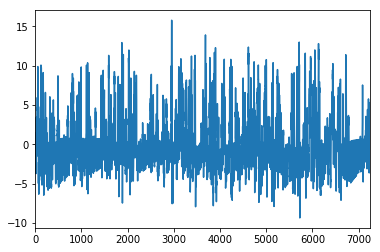

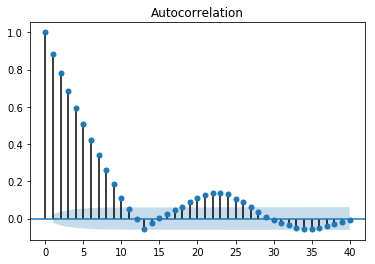

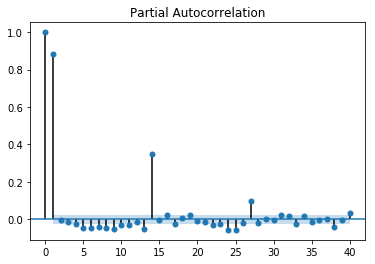

In [9]:
for i in [0,5,11]:
    print("{}-th resid".format(i+1))
    resid_i = resids.iloc[:,i]
    resid_i.plot()
    print("Mean {}".format(resid_i.mean()))
    print("Std {}".format(resid_i.std()))
    statm.graphics.tsa.plot_acf(resid_i, lags=40)
    statm.graphics.tsa.plot_pacf(resid_i,lags=40)
    plt.show()